In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [17]:
df = pd.read_csv('laliga_defensive.csv', header = 1)
df.head()

df_1 = pd.read_csv('laliga_gca.csv', header = 1)
df_2 = pd.read_csv('laliga_passdata.csv', header = 1)
df_3 = pd.read_csv('laliga_passtype.csv', header = 1)
df_4 = pd.read_csv('laliga_shooting.csv', header = 1)

df = pd.merge(df, df_1, on = 'Player')
df = pd.merge(df, df_2, on = 'Player')
df = pd.merge(df, df_3, on = 'Player')
df = pd.merge(df, df_4, on = 'Player')

df.head()

,Rk_x,Player,Nation_x,Pos_x,Squad_x,Age_x,Born_x,90s_x,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att_x,Tkl%,Past,Press_x,Succ,%,Def 3rd.1,Mid 3rd.1,Att 3rd.1,Blocks_x,Sh_x,ShSv,Pass,Int_x,Tkl+Int,Clr,Err,Matches_x,Rk_y,Nation_y,Pos_y,Squad_y,Age_y,Born_y,90s_y,SCA,SCA90,PassLive,PassDead,Drib,Sh_y,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,OG,Matches_y,Rk_x,Nation_x,Pos_x,Squad_x,Age_x,Born_x,90s_x,Cmp_x,Att_y,Cmp%,TotDist,PrgDist,Cmp.1,Att.1,Cmp%.1,Cmp.2,Att.2,Cmp%.2,Cmp.3,Att.3,Cmp%.3,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,Matches_x,Rk_y,Nation_y,Pos_y,Squad_y,Age_y,Born_y,90s_y,Att,Live,Dead,FK_x,TB,Press_y,Sw,Crs,CK,In,Out,Str,Ground,Low,High,Left,Right,Head,TI,Other,Cmp_y,Off,Out.1,Int_y,Blocks_y,Matches_y,Rk,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK_y,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,Marcos Acuña\Marcos-Acuna,ar ARG,DF,Sevilla,29-122,1991,14.7,33.0,23,19.0,10.0,4.0,11.0,20.0,55.0,9.0,172.0,57.0,33.1,75.0,67.0,30.0,25.0,2.0,0.0,23.0,15,48.0,17.0,0.0,Matches,1,ar ARG,DF,Sevilla,29-122,1991,14.7,30.0,2.04,21.0,3.0,3.0,2.0,0.0,1.0,2.0,0.14,1.0,0.0,0.0,1.0,0.0,0.0,0.0,Matches,1,ar ARG,DF,Sevilla,29-122,1991,14.7,798.0,989.0,80.7,15535.0,6404.0,309.0,342.0,90.4,374.0,426.0,87.8,105.0,194.0,54.1,0,1.3,-1.3,16.0,62.0,19.0,9.0,66.0,Matches,1,ar ARG,DF,Sevilla,29-122,1991,14.7,989.0,852.0,137.0,15.0,1.0,97.0,28.0,36,7.0,1.0,4.0,0.0,572.0,172.0,245.0,714.0,122.0,28.0,115.0,2.0,798.0,1.0,20.0,18.0,28.0,Matches,1,ar ARG,DF,Sevilla,29-122,1991,14.7,0,11,1,9.1,0.75,0.07,0.0,0.0,20.9,0.0,0,0,0.8,0.8,0.07,-0.8,-0.8,Matches
1,2,Bobby Adekanye\Bobby-Adekanye,nl NED,FWMF,Cádiz,22-013,1999,0.4,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,1.0,20.0,1.0,0.0,4.0,1.0,0.0,0.0,1.0,0,0.0,0.0,0.0,Matches,2,nl NED,FWMF,Cádiz,22-013,1999,0.4,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Matches,2,nl NED,FWMF,Cádiz,22-013,1999,0.4,7.0,10.0,70.0,99.0,1.0,3.0,3.0,100.0,3.0,4.0,75.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Matches,2,nl NED,FWMF,Cádiz,22-013,1999,0.4,10.0,10.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,7.0,1.0,2.0,9.0,0.0,1.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,Matches,2,nl NED,FWMF,Cádiz,22-013,1999,0.4,0,1,0,0.0,2.50,0.00,0.0,NaN,17.5,0.0,0,0,0.2,0.2,0.17,-0.2,-0.2,Matches
2,3,Martin Agirregabiria\Martin-Agirregabiria,es ESP,DFMF,Alavés,24-293,1996,9.1,16.0,7,7.0,6.0,3.0,4.0,14.0,28.6,10.0,106.0,28.0,26.4,42.0,50.0,14.0,18.0,3.0,1.0,15.0,20,36.0,15.0,1.0,Matches,3,es ESP,DFMF,Alavés,24-293,1996,9.1,15.0,1.65,11.0,3.0,0.0,0.0,0.0,1.0,2.0,0.22,2.0,0.0,0.0,0.0,0.0,0.0,0.0,Matches,3,es ESP,DFMF,Alavés,24-293,1996,9.1,232.0,330.0,70.3,4437.0,2126.0,106.0,129.0,82.2,91.0,127.0,71.7,30.0,59.0,50.8,1,0.8,0.2,9.0,19.0,11.0,6.0,23.0,Matches,3,es ESP,DFMF,Alavés,24-293,1996,9.1,330.0,258.0,72.0,13.0,1.0,35.0,11.0,14,0.0,0.0,0.0,0.0,172.0,73.0,85.0,30.0,211.0,22.0,59.0,1.0,232.0,2.0,8.0,10.0,9.0,Matches,3,es ESP,DFMF,Alavés,24-293,1996,9.1,0,2,0,0.0,0.22,0.00,0.0,NaN,14.3,0.0,0,0,0.2,0.2,0.10,-0.2,-0.2,Matches
3,4,Joseph Aidoo\Joseph-Aidoo,gh GHA,DF,Celta Vigo,25-151,1995,8.2,18.0,11,13.0,4.0,1.0,6.0,13.0,46.2,7.0,102.0,35.0,34.3,57.0,44.0,1.0,14.0,2.0,0.0,12.0,9,27.0,61.0,0.0,Matches,4,gh GHA,DF,Celta Vigo,25-151,1995,8.2,6.0,0.73,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Matches,4,gh GHA,DF,Celta Vigo,25-151,1995,8.2,314.0,377.0,83.3,7024.0,2273.0,76.0,86.0,88.4,175.0,196.0,89.3,62.0,83.0,74.7,0,0.6,-0.6,2.0,26.0,2.0,0.0,28.0,Matches,4,gh GHA,DF,Celta Vigo,25-151,1995,8.2,377.0,368.0,9.0,8.0,2.0,46.0,5.0,1,0.0,0.0,0.0,0.0,272.0,44.0,61.0,53.0,281.0,26.0,1.0,4.0,314.0,3.0,8.0,4.0,11.0,Matches,4,gh GHA,DF,Celta Vigo,25-151,1995,8.2,0,5,0,0.0,0.61,0.00,0.0,NaN,17.6,0.0,0,0,0.5,0.5,0.11,-0.5,-0.5,Matches
4,5,Carlos Akapo\Carlos-Akapo,gq EQG,DF,Cádiz,27-352,1993,4.9,14.0,9,13.0,1.0,0.0,8.0,13.0,61.5,5.0,56.0,17.0,30.4,41.0,13.0,2.0,15.0,3.0,0.0,12.0,5,19.0,21.0,2.0,Matches,5,gq EQG,DF,Cádiz,27-352,1993,4.9,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0

In [18]:
df = df.loc[:,~df.columns.duplicated()]
df.head()

,Rk_x,Player,Nation_x,Pos_x,Squad_x,Age_x,Born_x,90s_x,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att_x,Tkl%,Past,Press_x,Succ,%,Def 3rd.1,Mid 3rd.1,Att 3rd.1,Blocks_x,Sh_x,ShSv,Pass,Int_x,Tkl+Int,Clr,Err,Matches_x,Rk_y,Nation_y,Pos_y,Squad_y,Age_y,Born_y,90s_y,SCA,SCA90,PassLive,PassDead,Drib,Sh_y,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,OG,Matches_y,Cmp_x,Att_y,Cmp%,TotDist,PrgDist,Cmp.1,Att.1,Cmp%.1,Cmp.2,Att.2,Cmp%.2,Cmp.3,Att.3,Cmp%.3,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,Att,Live,Dead,FK_x,TB,Press_y,Sw,Crs,CK,In,Out,Str,Ground,Low,High,Left,Right,Head,TI,Other,Cmp_y,Off,Out.1,Int_y,Blocks_y,Rk,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK_y,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,Marcos Acuña\Marcos-Acuna,ar ARG,DF,Sevilla,29-122,1991,14.7,33.0,23,19.0,10.0,4.0,11.0,20.0,55.0,9.0,172.0,57.0,33.1,75.0,67.0,30.0,25.0,2.0,0.0,23.0,15,48.0,17.0,0.0,Matches,1,ar ARG,DF,Sevilla,29-122,1991,14.7,30.0,2.04,21.0,3.0,3.0,2.0,0.0,1.0,2.0,0.14,1.0,0.0,0.0,1.0,0.0,0.0,0.0,Matches,798.0,989.0,80.7,15535.0,6404.0,309.0,342.0,90.4,374.0,426.0,87.8,105.0,194.0,54.1,0,1.3,-1.3,16.0,62.0,19.0,9.0,66.0,989.0,852.0,137.0,15.0,1.0,97.0,28.0,36,7.0,1.0,4.0,0.0,572.0,172.0,245.0,714.0,122.0,28.0,115.0,2.0,798.0,1.0,20.0,18.0,28.0,1,ar ARG,DF,Sevilla,29-122,1991,14.7,0,11,1,9.1,0.75,0.07,0.0,0.0,20.9,0.0,0,0,0.8,0.8,0.07,-0.8,-0.8,Matches
1,2,Bobby Adekanye\Bobby-Adekanye,nl NED,FWMF,Cádiz,22-013,1999,0.4,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,1.0,20.0,1.0,0.0,4.0,1.0,0.0,0.0,1.0,0,0.0,0.0,0.0,Matches,2,nl NED,FWMF,Cádiz,22-013,1999,0.4,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Matches,7.0,10.0,70.0,99.0,1.0,3.0,3.0,100.0,3.0,4.0,75.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,7.0,1.0,2.0,9.0,0.0,1.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,2,nl NED,FWMF,Cádiz,22-013,1999,0.4,0,1,0,0.0,2.50,0.00,0.0,NaN,17.5,0.0,0,0,0.2,0.2,0.17,-0.2,-0.2,Matches
2,3,Martin Agirregabiria\Martin-Agirregabiria,es ESP,DFMF,Alavés,24-293,1996,9.1,16.0,7,7.0,6.0,3.0,4.0,14.0,28.6,10.0,106.0,28.0,26.4,42.0,50.0,14.0,18.0,3.0,1.0,15.0,20,36.0,15.0,1.0,Matches,3,es ESP,DFMF,Alavés,24-293,1996,9.1,15.0,1.65,11.0,3.0,0.0,0.0,0.0,1.0,2.0,0.22,2.0,0.0,0.0,0.0,0.0,0.0,0.0,Matches,232.0,330.0,70.3,4437.0,2126.0,106.0,129.0,82.2,91.0,127.0,71.7,30.0,59.0,50.8,1,0.8,0.2,9.0,19.0,11.0,6.0,23.0,330.0,258.0,72.0,13.0,1.0,35.0,11.0,14,0.0,0.0,0.0,0.0,172.0,73.0,85.0,30.0,211.0,22.0,59.0,1.0,232.0,2.0,8.0,10.0,9.0,3,es ESP,DFMF,Alavés,24-293,1996,9.1,0,2,0,0.0,0.22,0.00,0.0,NaN,14.3,0.0,0,0,0.2,0.2,0.10,-0.2,-0.2,Matches
3,4,Joseph Aidoo\Joseph-Aidoo,gh GHA,DF,Celta Vigo,25-151,1995,8.2,18.0,11,13.0,4.0,1.0,6.0,13.0,46.2,7.0,102.0,35.0,34.3,57.0,44.0,1.0,14.0,2.0,0.0,12.0,9,27.0,61.0,0.0,Matches,4,gh GHA,DF,Celta Vigo,25-151,1995,8.2,6.0,0.73,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Matches,314.0,377.0,83.3,7024.0,2273.0,76.0,86.0,88.4,175.0,196.0,89.3,62.0,83.0,74.7,0,0.6,-0.6,2.0,26.0,2.0,0.0,28.0,377.0,368.0,9.0,8.0,2.0,46.0,5.0,1,0.0,0.0,0.0,0.0,272.0,44.0,61.0,53.0,281.0,26.0,1.0,4.0,314.0,3.0,8.0,4.0,11.0,4,gh GHA,DF,Celta Vigo,25-151,1995,8.2,0,5,0,0.0,0.61,0.00,0.0,NaN,17.6,0.0,0,0,0.5,0.5,0.11,-0.5,-0.5,Matches
4,5,Carlos Akapo\Carlos-Akapo,gq EQG,DF,Cádiz,27-352,1993,4.9,14.0,9,13.0,1.0,0.0,8.0,13.0,61.5,5.0,56.0,17.0,30.4,41.0,13.0,2.0,15.0,3.0,0.0,12.0,5,19.0,21.0,2.0,Matches,5,gq EQG,DF,Cádiz,27-352,1993,4.9,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Matches,107.0,170.0,62.9,1897.0,923.0,51.0,61.0,83.6,45.0,71.0,63.4,9.0,32.0,28.1,0,0.0,0.0,0.0,5.0,2.0,2.0,5.0,170.0,113.0,57.0,3.0,0.0,24.0,4.0,9,0.0,0.0,0.0,0.0,58.0,51.0,61.0,2.0,93.0,12.0,54.0,1.0,107.0,1.0,7.0,7.0,6.0,5,gq EQG,DF,Cádiz,27-352,1993,4.9,0,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0.0,0,0,0.0,0.0,NaN,0.0,0.0,Matches


In [19]:
df.Pos_x.unique()  

array(['DF', 'FWMF', 'DFMF', 'MF', 'FW', 'MFDF', 'MFFW', 'GK', 'DFFW',
       'GKMF'], dtype=object)

In [20]:
# midfielders

df = df[df['Pos_x'] == 'MF']
df = df.drop(['Rk_x'], axis = 1)
# df.head()
df = df.drop_duplicates(['Player']) #works for now
for i, r in df.iterrows():
    df.loc[i, 'Player'] = df.loc[i, 'Player'].split('\\')[0]
df.head()

,Player,Nation_x,Pos_x,Squad_x,Age_x,Born_x,90s_x,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att_x,Tkl%,Past,Press_x,Succ,%,Def 3rd.1,Mid 3rd.1,Att 3rd.1,Blocks_x,Sh_x,ShSv,Pass,Int_x,Tkl+Int,Clr,Err,Matches_x,Rk_y,Nation_y,Pos_y,Squad_y,Age_y,Born_y,90s_y,SCA,SCA90,PassLive,PassDead,Drib,Sh_y,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,OG,Matches_y,Cmp_x,Att_y,Cmp%,TotDist,PrgDist,Cmp.1,Att.1,Cmp%.1,Cmp.2,Att.2,Cmp%.2,Cmp.3,Att.3,Cmp%.3,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,Att,Live,Dead,FK_x,TB,Press_y,Sw,Crs,CK,In,Out,Str,Ground,Low,High,Left,Right,Head,TI,Other,Cmp_y,Off,Out.1,Int_y,Blocks_y,Rk,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK_y,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
5,Paul Akouokou,ci CIV,MF,Betis,23-069,1997,4.1,12.0,8,3.0,9.0,0.0,2.0,5.0,40.0,3.0,74.0,20.0,27.0,17.0,52.0,5.0,6.0,1.0,0.0,5.0,6,18.0,6.0,0.0,Matches,6,ci CIV,MF,Betis,23-069,1997,4.1,5.0,1.21,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Matches,167.0,182.0,91.8,3227.0,592.0,58.0,63.0,92.1,83.0,86.0,96.5,22.0,28.0,78.6,0,0.4,-0.4,2.0,13.0,1.0,1.0,6.0,182.0,181.0,1.0,1.0,0.0,20.0,3.0,2,0.0,0.0,0.0,0.0,149.0,16.0,17.0,21.0,150.0,5.0,0.0,1.0,167.0,0.0,1.0,3.0,0.0,6,ci CIV,MF,Betis,23-069,1997,4.1,0,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0.0,0,0,0.0,0.0,NaN,0.0,0.0,Matches
6,Jony Álamo,es ESP,MF,Elche,19-155,2001,0.8,1.0,1,0.0,1.0,0.0,0.0,2.0,0.0,2.0,9.0,4.0,44.4,3.0,5.0,1.0,1.0,0.0,0.0,1.0,0,1.0,1.0,0.0,Matches,7,es ESP,MF,Elche,19-155,2001,0.8,1.0,1.23,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.23,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Matches,14.0,16.0,87.5,289.0,41.0,3.0,3.0,100.0,8.0,9.0,88.9,2.0,2.0,100.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,16.0,16.0,0.0,0.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.0,15.0,1.0,0.0,2.0,14.0,0.0,0.0,0.0,14.0,0.0,1.0,0.0,0.0,7,es ESP,MF,Elche,19-155,2001,0.8,0,1,0,0.0,1.23,0.00,0.0,NaN,26.0,0.0,0,0,0.0,0.0,0.02,0.0,0.0,Matches
29,Carles Aleñá,es ESP,MF,Barcelona,23-053,1998,0.5,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,14.0,1.0,7.1,5.0,8.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,Matches,14,es ESP,MFFW,Getafe,23-053,1998,5.8,18.0,3.09,8.0,3.0,1.0,2.0,3.0,1.0,2.0,0.34,2.0,0.0,0.0,0.0,0.0,0.0,0.0,Matches,183.0,240.0,76.3,3710.0,874.0,74.0,90.0,82.2,68.0,78.0,87.2,38.0,61.0,62.3,2,0.9,1.1,8.0,30.0,8.0,1.0,28.0,240.0,223.0,17.0,5.0,1.0,37.0,11.0,6,9.0,0.0,6.0,0.0,169.0,29.0,42.0,201.0,25.0,7.0,2.0,0.0,183.0,0.0,6.0,11.0,10.0,14,es ESP,MFFW,Getafe,23-053,1998,5.8,0,8,0,0.0,1.37,0.00,0.0,NaN,20.3,0.0,0,0,0.4,0.4,0.04,-0.4,-0.4,Matches
45,Sergio Álvarez,es ESP,MF,Eibar,29-035,1992,12.2,27.0,18,4.0,20.0,3.0,4.0,18.0,22.2,14.0,243.0,70.0,28.8,62.0,154.0,27.0,21.0,2.0,0.0,19.0,6,33.0,27.0,0.0,Matches,16,es ESP,MF,Eibar,29-035,1992,12.2,8.0,0.65,8.0,0.0,0.0,0.0,0.0,0.0,1.0,0.08,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Matches,361.0,482.0,74.9,7080.0,1506.0,131.0,161.0,81.4,162.0,204.0,79.4,57.0,93.0,61.3,0,0.8,-0.8,6.0,36.0,2.0,1.0,27.0,482.0,472.0,10.0,8.0,0.0,91.0,19.0,4,0.0,0.0,0.0,0.0,285.0,65.0,132.0,45.0,357.0,50.0,1.0,1.0,361.0,1.0,18.0,6.0,11.0,16,es ESP,MF,Eibar,29-035,1992,12.2,0,4,2,50.0,0.33,0.16,0.0,0.0,19.6,0.0,0,0,0.1,0.1,0.04,-0.1,-0.1,Matches
47,Jon Ander Garrido,es ESP,MF,Cádiz,31-141,1989,5.6,11.0,9,6.0,2.0,3.0,3.0,19.0,15.8,16.0,106.0,40.0,37.7,38.0,52.0,16.0,12.0,1.0,0.0,11.0,6,17.0,9.0,0.0,Matches,18,es ESP,MF,Cádiz,31-141,1989,5.6,7.0,1.25,6.0,0.0,0.0,0.0,0.0,1.0,1.0,0.18,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Matches,144.0,179.0,80.4,2693.0,725.0,55.0,62.0,88.7,64.0,75.0,85.3,17.0,26.0,65.4,0,0.1,-0.1,2.0,18.0,1.0,1.0,9.0,179.0,173.0,6.0,6.0,0.0,33.0,4.0,2,0.0,0.0,0.0,0.0,109.0,34.0,36.0,23.0,125.0,20.0,0.0,0.0,144.0,0.0,5.0,8.0,3.0,18,es ESP,MF,Cádiz,31-141,1989,5.6,0,5,1,20.0,0.89,0.18,0.0,0.0,12.7,0.0,0,0,0.4,0.4,0.07,-0.4,-0.4,Matches


In [21]:
cols_to_remove = []
for col in df.columns:
    try:
        _ = df[col].astype(float)
    except ValueError:
        print('Couldn\'t covert %s to float' % col)
        cols_to_remove.append(col)
        pass

# keep only the columns in df that do not contain string
df_new = df[[col for col in df.columns if col not in cols_to_remove]]

df_new = df_new.fillna(0)


Couldn't covert Player to float
Couldn't covert Nation_x to float
Couldn't covert Pos_x to float
Couldn't covert Squad_x to float
Couldn't covert Age_x to float
Couldn't covert Matches_x to float
Couldn't covert Nation_y to float
Couldn't covert Pos_y to float
Couldn't covert Squad_y to float
Couldn't covert Age_y to float
Couldn't covert Matches_y to float
Couldn't covert Nation to float
Couldn't covert Pos to float
Couldn't covert Squad to float
Couldn't covert Age to float
Couldn't covert Matches to float


In [22]:
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(df_new)

In [23]:
df_new['pca-one'] = pca_result[:,0]
df_new['pca-two'] = pca_result[:,1] 
# df_new['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.99587226 0.0019785 ]


In [24]:
pca_result.shape

(122, 2)

<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

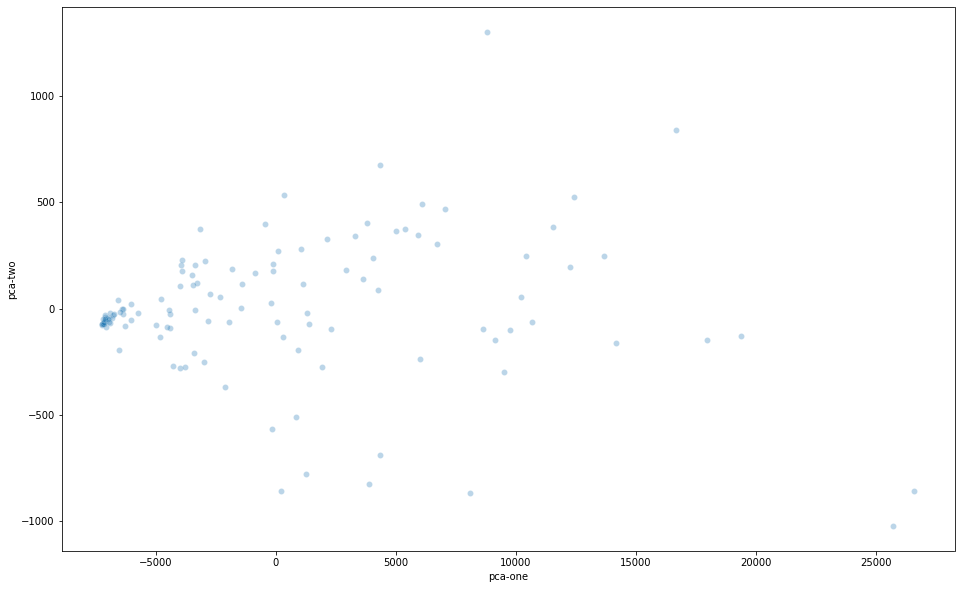

In [25]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    palette=sns.color_palette("hls"),
    data=df_new,
    legend="full",
    alpha=0.3
)

In [26]:
df_new.head()

,Born_x,90s_x,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att_x,Tkl%,Past,Press_x,Succ,%,Def 3rd.1,Mid 3rd.1,Att 3rd.1,Blocks_x,Sh_x,ShSv,Pass,Int_x,Tkl+Int,Clr,Err,Rk_y,Born_y,90s_y,SCA,SCA90,PassLive,PassDead,Drib,Sh_y,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,OG,Cmp_x,Att_y,Cmp%,TotDist,PrgDist,Cmp.1,Att.1,Cmp%.1,Cmp.2,Att.2,Cmp%.2,Cmp.3,Att.3,Cmp%.3,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,Att,Live,Dead,FK_x,TB,Press_y,Sw,Crs,CK,In,Out,Str,Ground,Low,High,Left,Right,Head,TI,Other,Cmp_y,Off,Out.1,Int_y,Blocks_y,Rk,Born,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK_y,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,pca-one,pca-two
5,1997,4.1,12.0,8,3.0,9.0,0.0,2.0,5.0,40.0,3.0,74.0,20.0,27.0,17.0,52.0,5.0,6.0,1.0,0.0,5.0,6,18.0,6.0,0.0,6,1997,4.1,5.0,1.21,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167.0,182.0,91.8,3227.0,592.0,58.0,63.0,92.1,83.0,86.0,96.5,22.0,28.0,78.6,0,0.4,-0.4,2.0,13.0,1.0,1.0,6.0,182.0,181.0,1.0,1.0,0.0,20.0,3.0,2,0.0,0.0,0.0,0.0,149.0,16.0,17.0,21.0,150.0,5.0,0.0,1.0,167.0,0.0,1.0,3.0,0.0,6,1997,4.1,0,0,0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,-3927.387947,175.928360
6,2001,0.8,1.0,1,0.0,1.0,0.0,0.0,2.0,0.0,2.0,9.0,4.0,44.4,3.0,5.0,1.0,1.0,0.0,0.0,1.0,0,1.0,1.0,0.0,7,2001,0.8,1.0,1.23,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.23,1.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,16.0,87.5,289.0,41.0,3.0,3.0,100.0,8.0,9.0,88.9,2.0,2.0,100.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,16.0,16.0,0.0,0.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.0,15.0,1.0,0.0,2.0,14.0,0.0,0.0,0.0,14.0,0.0,1.0,0.0,0.0,7,2001,0.8,0,1,0,0.0,1.23,0.00,0.0,0.0,26.0,0.0,0,0,0.0,0.0,0.02,0.0,0.0,-6940.459683,-42.347575
29,1998,0.5,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,1.0,7.1,5.0,8.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,14,1998,5.8,18.0,3.09,8.0,3.0,1.0,2.0,3.0,1.0,2.0,0.34,2.0,0.0,0.0,0.0,0.0,0.0,0.0,183.0,240.0,76.3,3710.0,874.0,74.0,90.0,82.2,68.0,78.0,87.2,38.0,61.0,62.3,2,0.9,1.1,8.0,30.0,8.0,1.0,28.0,240.0,223.0,17.0,5.0,1.0,37.0,11.0,6,9.0,0.0,6.0,0.0,169.0,29.0,42.0,201.0,25.0,7.0,2.0,0.0,183.0,0.0,6.0,11.0,10.0,14,1998,5.8,0,8,0,0.0,1.37,0.00,0.0,0.0,20.3,0.0,0,0,0.4,0.4,0.04,-0.4,-0.4,-3386.364250,-4.487928
45,1992,12.2,27.0,18,4.0,20.0,3.0,4.0,18.0,22.2,14.0,243.0,70.0,28.8,62.0,154.0,27.0,21.0,2.0,0.0,19.0,6,33.0,27.0,0.0,16,1992,12.2,8.0,0.65,8.0,0.0,0.0,0.0,0.0,0.0,1.0,0.08,1.0,0.0,0.0,0.0,0.0,0.0,0.0,361.0,482.0,74.9,7080.0,1506.0,131.0,161.0,81.4,162.0,204.0,79.4,57.0,93.0,61.3,0,0.8,-0.8,6.0,36.0,2.0,1.0,27.0,482.0,472.0,10.0,8.0,0.0,91.0,19.0,4,0.0,0.0,0.0,0.0,285.0,65.0,132.0,45.0,357.0,50.0,1.0,1.0,361.0,1.0,18.0,6.0,11.0,16,1992,12.2,0,4,2,50.0,0.33,0.16,0.0,0.0,19.6,0.0,0,0,0.1,0.1,0.04,-0.1,-0.1,88.905440,272.593751
47,1989,5.6,11.0,9,6.0,2.0,3.0,3.0,19.0,15.8,16.0,106.0,40.0,37.7,38.0,52.0,16.0,12.0,1.0,0.0,11.0,6,17.0,9.0,0.0,18,1989,5.6,7.0,1.25,6.0,0.0,0.0,0.0,0.0,1.0,1.0,0.18,1.0,0.0,0.0,0.0,0.0,0.0,0.0,144.0,179.0,80.4,2693.0,725.0,55.0,62.0,88.7,64.0,75.0,85.3,17.0,26.0,65.4,0,0.1,-0.1,2.0,18.0,1.0,1.0,9.0,179.0,173.0,6.0,6.0,0.0,33.0,4.0,2,0.0,0.0,0.0,0.0,109.0,34.0,36.0,23.0,125.0,20.0,0.0,0.0,144.0,0.0,5.0,8.0,3.0,18,1989,5.6,0,5,1,20.0,0.89,0.18,0.0,0.0,12.7,0.0,0,0,0.4,0.4,0.07,-0.4,-0.4,-4410.023209,-90.215371


In [27]:
for index, row in df_new.iterrows():
#     print(index)
    df_new.loc[index, 'Player name'] = df.loc[index, 'Player']
    df_new.loc[index, 'Team'] = df.loc[index, 'Squad_x']
#     break

In [28]:
df_new.head()

,Born_x,90s_x,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att_x,Tkl%,Past,Press_x,Succ,%,Def 3rd.1,Mid 3rd.1,Att 3rd.1,Blocks_x,Sh_x,ShSv,Pass,Int_x,Tkl+Int,Clr,Err,Rk_y,Born_y,90s_y,SCA,SCA90,PassLive,PassDead,Drib,Sh_y,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,OG,Cmp_x,Att_y,Cmp%,TotDist,PrgDist,Cmp.1,Att.1,Cmp%.1,Cmp.2,Att.2,Cmp%.2,Cmp.3,Att.3,Cmp%.3,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,Att,Live,Dead,FK_x,TB,Press_y,Sw,Crs,CK,In,Out,Str,Ground,Low,High,Left,Right,Head,TI,Other,Cmp_y,Off,Out.1,Int_y,Blocks_y,Rk,Born,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK_y,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,pca-one,pca-two,Player name,Team
5,1997,4.1,12.0,8,3.0,9.0,0.0,2.0,5.0,40.0,3.0,74.0,20.0,27.0,17.0,52.0,5.0,6.0,1.0,0.0,5.0,6,18.0,6.0,0.0,6,1997,4.1,5.0,1.21,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167.0,182.0,91.8,3227.0,592.0,58.0,63.0,92.1,83.0,86.0,96.5,22.0,28.0,78.6,0,0.4,-0.4,2.0,13.0,1.0,1.0,6.0,182.0,181.0,1.0,1.0,0.0,20.0,3.0,2,0.0,0.0,0.0,0.0,149.0,16.0,17.0,21.0,150.0,5.0,0.0,1.0,167.0,0.0,1.0,3.0,0.0,6,1997,4.1,0,0,0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,-3927.387947,175.928360,Paul Akouokou,Betis
6,2001,0.8,1.0,1,0.0,1.0,0.0,0.0,2.0,0.0,2.0,9.0,4.0,44.4,3.0,5.0,1.0,1.0,0.0,0.0,1.0,0,1.0,1.0,0.0,7,2001,0.8,1.0,1.23,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.23,1.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,16.0,87.5,289.0,41.0,3.0,3.0,100.0,8.0,9.0,88.9,2.0,2.0,100.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,16.0,16.0,0.0,0.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.0,15.0,1.0,0.0,2.0,14.0,0.0,0.0,0.0,14.0,0.0,1.0,0.0,0.0,7,2001,0.8,0,1,0,0.0,1.23,0.00,0.0,0.0,26.0,0.0,0,0,0.0,0.0,0.02,0.0,0.0,-6940.459683,-42.347575,Jony Álamo,Elche
29,1998,0.5,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,1.0,7.1,5.0,8.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,14,1998,5.8,18.0,3.09,8.0,3.0,1.0,2.0,3.0,1.0,2.0,0.34,2.0,0.0,0.0,0.0,0.0,0.0,0.0,183.0,240.0,76.3,3710.0,874.0,74.0,90.0,82.2,68.0,78.0,87.2,38.0,61.0,62.3,2,0.9,1.1,8.0,30.0,8.0,1.0,28.0,240.0,223.0,17.0,5.0,1.0,37.0,11.0,6,9.0,0.0,6.0,0.0,169.0,29.0,42.0,201.0,25.0,7.0,2.0,0.0,183.0,0.0,6.0,11.0,10.0,14,1998,5.8,0,8,0,0.0,1.37,0.00,0.0,0.0,20.3,0.0,0,0,0.4,0.4,0.04,-0.4,-0.4,-3386.364250,-4.487928,Carles Aleñá,Barcelona
45,1992,12.2,27.0,18,4.0,20.0,3.0,4.0,18.0,22.2,14.0,243.0,70.0,28.8,62.0,154.0,27.0,21.0,2.0,0.0,19.0,6,33.0,27.0,0.0,16,1992,12.2,8.0,0.65,8.0,0.0,0.0,0.0,0.0,0.0,1.0,0.08,1.0,0.0,0.0,0.0,0.0,0.0,0.0,361.0,482.0,74.9,7080.0,1506.0,131.0,161.0,81.4,162.0,204.0,79.4,57.0,93.0,61.3,0,0.8,-0.8,6.0,36.0,2.0,1.0,27.0,482.0,472.0,10.0,8.0,0.0,91.0,19.0,4,0.0,0.0,0.0,0.0,285.0,65.0,132.0,45.0,357.0,50.0,1.0,1.0,361.0,1.0,18.0,6.0,11.0,16,1992,12.2,0,4,2,50.0,0.33,0.16,0.0,0.0,19.6,0.0,0,0,0.1,0.1,0.04,-0.1,-0.1,88.905440,272.593751,Sergio Álvarez,Eibar
47,1989,5.6,11.0,9,6.0,2.0,3.0,3.0,19.0,15.8,16.0,106.0,40.0,37.7,38.0,52.0,16.0,12.0,1.0,0.0,11.0,6,17.0,9.0,0.0,18,1989,5.6,7.0,1.25,6.0,0.0,0.0,0.0,0.0,1.0,1.0,0.18,1.0,0.0,0.0,0.0,0.0,0.0,0.0,144.0,179.0,80.4,2693.0,725.0,55.0,62.0,88.7,64.0,75.0,85.3,17.0,26.0,65.4,0,0.1,-0.1,2.0,18.0,1.0,1.0,9.0,179.0,173.0,6.0,6.0,0.0,33.0,4.0,2,0.0,0.0,0.0,0.0,109.0,34.0,36.0,23.0,125.0,20.0,0.0,0.0,144.0,0.0,5.0,8.0,3.0,18,1989,5.6,0,5,1,20.0,0.89,0.18,0.0,0.0,12.7,0.0,0,0,0.4,0.4,0.07,-0.4,-0.4,-4410.023209,-90.215371,Jon Ander Garrido,Cádiz


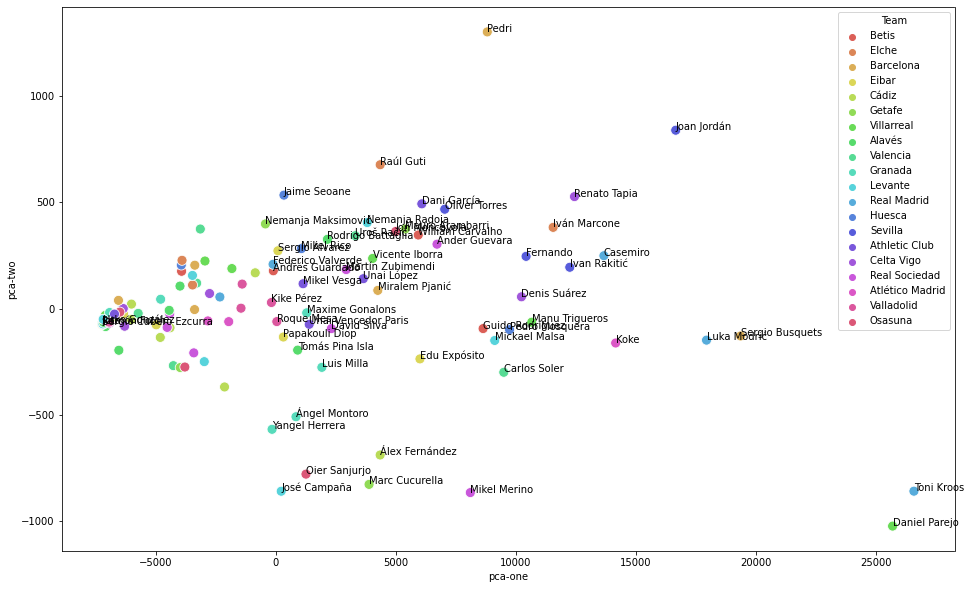

In [29]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Team",
    palette=sns.color_palette("hls", 20),
    data=df_new,
    legend="full",
    alpha=1,
    s = 100
)

import math
def check(x, y):
    radius = 3300
    for index, row in df_new.iterrows():
        x1 = df_new.loc[index, 'pca-one']
        y1 = df_new.loc[index, 'pca-two']
        if(math.sqrt((x-x1)**2 + (y-y1)**2) <= radius):
            return True
        return False

for i, row in df_new.iterrows():
    if(check(df_new.loc[i, 'pca-one'], df_new.loc[i, 'pca-two']) == False):
        plt.text(x=df_new.loc[i, 'pca-one']+0.2, y=df_new.loc[i, 'pca-two']+0.2, s=df_new.loc[i, 'Player name'])
        
plt.savefig('pca_mid.png')

In [30]:
# ax = plt.figure(figsize=(16,10)).gca(projection='3d')
# ax.scatter(
#     xs=df_new["pca-one"], 
#     ys=df_new["pca-two"], 
#     zs=df_new["pca-three"], 
# )
# ax.set_xlabel('pca-one')
# ax.set_ylabel('pca-two')
# ax.set_zlabel('pca-three')
   
# plt.show()

In [33]:
### Wingers

df = pd.read_csv('laliga_defensive.csv', header = 1)
df.head()

df_1 = pd.read_csv('laliga_gca.csv', header = 1)
df_2 = pd.read_csv('laliga_passdata.csv', header = 1)
df_3 = pd.read_csv('laliga_passtype.csv', header = 1)
df_4 = pd.read_csv('laliga_shooting.csv', header = 1)

df = pd.merge(df, df_1, on = 'Player')
df = pd.merge(df, df_2, on = 'Player')
df = pd.merge(df, df_3, on = 'Player')
df = pd.merge(df, df_4, on = 'Player')

df.head()

df = df.loc[:,~df.columns.duplicated()]
df.head()

# wingers
df = df[df['Pos_x'].str.contains('FW')]
df = df.drop(['Rk_x'], axis = 1)
# df.head()
df = df.drop_duplicates(['Player']) #works for now
for i, r in df.iterrows():
    df.loc[i, 'Player'] = df.loc[i, 'Player'].split('\\')[0]
df.head()

,Player,Nation_x,Pos_x,Squad_x,Age_x,Born_x,90s_x,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att_x,Tkl%,Past,Press_x,Succ,%,Def 3rd.1,Mid 3rd.1,Att 3rd.1,Blocks_x,Sh_x,ShSv,Pass,Int_x,Tkl+Int,Clr,Err,Matches_x,Rk_y,Nation_y,Pos_y,Squad_y,Age_y,Born_y,90s_y,SCA,SCA90,PassLive,PassDead,Drib,Sh_y,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,OG,Matches_y,Cmp_x,Att_y,Cmp%,TotDist,PrgDist,Cmp.1,Att.1,Cmp%.1,Cmp.2,Att.2,Cmp%.2,Cmp.3,Att.3,Cmp%.3,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,Att,Live,Dead,FK_x,TB,Press_y,Sw,Crs,CK,In,Out,Str,Ground,Low,High,Left,Right,Head,TI,Other,Cmp_y,Off,Out.1,Int_y,Blocks_y,Rk,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK_y,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
1,Bobby Adekanye,nl NED,FWMF,Cádiz,22-013,1999,0.4,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,1.0,20.0,1.0,0.0,4.0,1.0,0.0,0.0,1.0,0,0.0,0.0,0.0,Matches,2,nl NED,FWMF,Cádiz,22-013,1999,0.4,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Matches,7.0,10.0,70.0,99.0,1.0,3.0,3.0,100.0,3.0,4.0,75.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,7.0,1.0,2.0,9.0,0.0,1.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,2,nl NED,FWMF,Cádiz,22-013,1999,0.4,0,1,0,0.0,2.50,0.00,0.00,NaN,17.5,0.0,0,0,0.2,0.2,0.17,-0.2,-0.2,Matches
9,Paco Alcácer,es ESP,FW,Villarreal,27-181,1993,11.5,4.0,3,1.0,1.0,2.0,1.0,5.0,20.0,4.0,95.0,32.0,33.7,4.0,42.0,49.0,9.0,0.0,0.0,9.0,6,10.0,3.0,0.0,Matches,10,es ESP,FW,Villarreal,27-181,1993,11.5,18.0,1.57,13.0,1.0,1.0,2.0,1.0,0.0,7.0,0.61,4.0,0.0,1.0,2.0,0.0,0.0,0.0,Matches,131.0,183.0,71.6,1985.0,314.0,80.0,102.0,78.4,26.0,42.0,61.9,15.0,20.0,75.0,3,2.1,0.9,11.0,2.0,4.0,0.0,5.0,183.0,157.0,26.0,0.0,4.0,26.0,5.0,3,0.0,0.0,0.0,0.0,115.0,42.0,26.0,23.0,139.0,11.0,1.0,2.0,131.0,2.0,4.0,6.0,7.0,10,es ESP,FW,Villarreal,27-181,1993,11.5,5,25,11,44.0,2.18,0.96,0.16,0.36,13.5,3.0,1,2,5.9,4.4,0.19,-0.9,-0.4,Matches
12,Iván Alejo,es ESP,MFFW,Cádiz,26-017,1995,4.1,5.0,2,2.0,2.0,1.0,1.0,13.0,7.7,12.0,115.0,18.0,15.7,39.0,46.0,30.0,10.0,0.0,0.0,10.0,0,5.0,4.0,0.0,Matches,13,es ESP,MFFW,Cádiz,26-017,1995,4.1,9.0,2.18,8.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Matches,58.0,103.0,56.3,967.0,349.0,35.0,50.0,70.0,19.0,27.0,70.4,4.0,16.0,25.0,0,0.4,-0.4,4.0,4.0,5.0,2.0,10.0,103.0,96.0,7.0,1.0,1.0,19.0,5.0,17,0.0,0.0,0.0,0.0,63.0,20.0,20.0,9.0,81.0,2.0,4.0,0.0,58.0,0.0,3.0,2.0,15.0,13,es ESP,MFFW,Cádiz,26-017,1995,4.1,1,8,3,37.5,1.94,0.73,0.13,0.33,17.1,0.0,0,0,0.7,0.7,0.09,0.3,0.3,Matches
13,Carles Aleñá,es ESP,MFFW,Getafe,23-053,1998,5.8,6.0,2,1.0,4.0,1.0,3.0,11.0,27.3,8.0,78.0,23.0,29.5,14.0,41.0,23.0,9.0,1.0,0.0,8.0,2,8.0,3.0,0.0,Matches,14,es ESP,MFFW,Getafe,23-053,1998,5.8,18.0,3.09,8.0,3.0,1.0,2.0,3.0,1.0,2.0,0.34,2.0,0.0,0.0,0.0,0.0,0.0,0.0,Matches,183.0,240.0,76.3,3710.0,874.0,74.0,90.0,82.2,68.0,78.0,87.2,38.0,61.0,62.3,2,0.9,1.1,8.0,30.0,8.0,1.0,28.0,240.0,223.0,17.0,5.0,1.0,37.0,11.0,6,9.0,0.0,6.0,0.0,169.0,29.0,42.0,201.0,25.0,7.0,2.0,0.0,183.0,0.0,6.0,11.0,10.0,14,es ESP,MFFW,Getafe,23-053,1998,5.8,0,8,0,0.0,1.37,0.00,0.00,NaN,20.3,0.0,0,0,0.4,0.4,0.04,-0.4,-0.4,Matches
55,Unai Arietaleanizbeaskoa,es ESP,FWMF,Eibar,22-057,1999,0.4,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,5.0,2.0,40.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,Matches,26,es ESP,FWMF,Eibar,22-057,1999,0.4,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Matches,3.0,6.0,50.0,44.0,15.0,1.0,3.0,33.3,2.0,2.0,100.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,2.0,2.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,26,es ESP,FWMF,Eibar,22-057,1999,0.4,0,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0.0,0,0,0.0,0.0,NaN,0.0,0.0,Matches


In [34]:
cols_to_remove = []
for col in df.columns:
    try:
        _ = df[col].astype(float)
    except ValueError:
        print('Couldn\'t covert %s to float' % col)
        cols_to_remove.append(col)
        pass

# keep only the columns in df that do not contain string
df_new = df[[col for col in df.columns if col not in cols_to_remove]]

df_new = df_new.fillna(0)

Couldn't covert Player to float
Couldn't covert Nation_x to float
Couldn't covert Pos_x to float
Couldn't covert Squad_x to float
Couldn't covert Age_x to float
Couldn't covert Matches_x to float
Couldn't covert Nation_y to float
Couldn't covert Pos_y to float
Couldn't covert Squad_y to float
Couldn't covert Age_y to float
Couldn't covert Matches_y to float
Couldn't covert Nation to float
Couldn't covert Pos to float
Couldn't covert Squad to float
Couldn't covert Age to float
Couldn't covert Matches to float


In [35]:
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(df_new)

df_new['pca-one'] = pca_result[:,0]
df_new['pca-two'] = pca_result[:,1] 
# df_new['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.98578188 0.00648341]


In [36]:
for index, row in df_new.iterrows():
#     print(index)
    df_new.loc[index, 'Player name'] = df.loc[index, 'Player']
    df_new.loc[index, 'Team'] = df.loc[index, 'Squad_x']

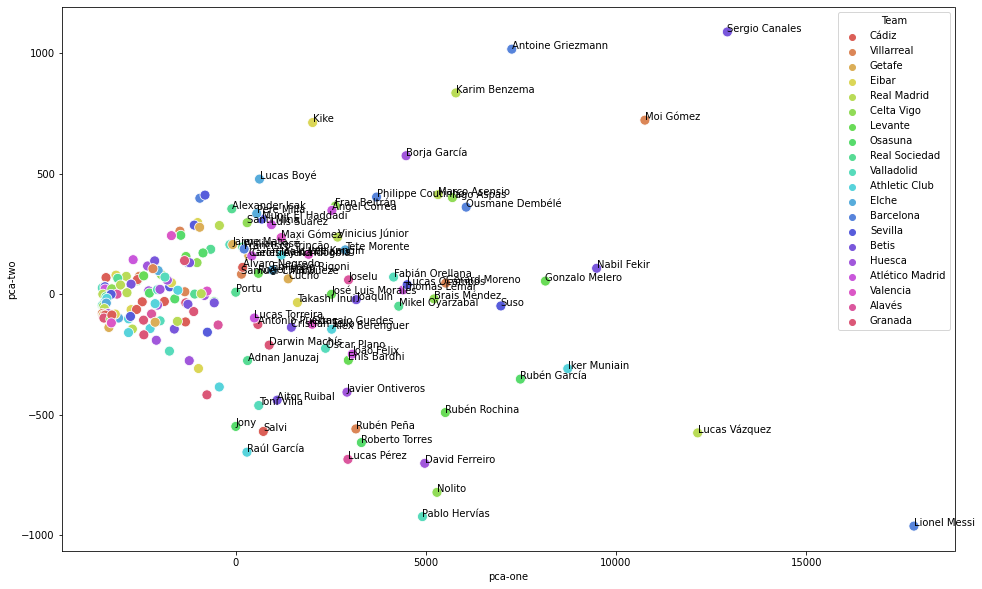

In [37]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Team",
    palette=sns.color_palette("hls", 20),
    data=df_new,
    legend="full",
    alpha=1,
    s = 100
)

import math
def check(x, y):
    radius = 3300
    for index, row in df_new.iterrows():
        x1 = df_new.loc[index, 'pca-one']
        y1 = df_new.loc[index, 'pca-two']
        if(math.sqrt((x-x1)**2 + (y-y1)**2) <= radius):
            return True
        return False

for i, row in df_new.iterrows():
    if(check(df_new.loc[i, 'pca-one'], df_new.loc[i, 'pca-two']) == False):
        plt.text(x=df_new.loc[i, 'pca-one']+0.2, y=df_new.loc[i, 'pca-two']+0.2, s=df_new.loc[i, 'Player name'])
        
plt.savefig('pca_fw.png')